
# Linear Interpolation and Numerical Differentiation



## 1. Linear Interpolation

Linear interpolation estimates unknown values between two known data points using the formula:

$$
y = y_0 + \frac{(x - x_0)(y_1 - y_0)}{x_1 - x_0}
$$


### Exercise- 
Find the linear interpolation value at x = 2.5 between the two unkown data points (1, 3) & (4, 12). Print your results.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def linear_interpolate(x0, y0, x1, y1, x):
    return y0 + ((x-x0)*(y1-y0))/(x1-x0)

x0 = input("x0 = ")
y0 = input ("y0 = ")
x1 = input ("x1 = ")
y1 = input ("y1 = ")
x = input ("x = ")

print ("linear interpolation value at x = 2.5 is: ")





linear interpolation value at x = 2.5 is: 



## 2. Numerical Differentiation

Numerical differentiation estimates the derivative of a function using discrete data points.

- Forward Difference:
$$f'(x) \approx \frac{f(x+h) - f(x)}{h}$$

- Backward Difference:
$$f'(x) \approx \frac{f(x) - f(x-h)}{h}$$

- Central Difference:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$


### Exercise- 
Find the derivative of f = sin (x) at x = pi/4 using foward difference, backward difference, and central difference. You decide the step size.

In [5]:
import numpy as np

f = np.sin
x = np.pi / 4
h = 1e-6  

forward = (f(x + h) - f(x)) / h
backward = (f(x) - f(x - h)) / h
central = (f(x + h) - f(x - h)) / (2 * h)

true = np.cos(x)

print(f"x = {x} (pi/4)")
print(f"h = {h}")
print(f"Forward difference : {forward:.10f}")
print(f"Backward difference: {backward:.10f}")
print(f"Central difference : {central:.10f}")
print(f"True derivative    : {true:.10f}")
print(f"Absolute errors    : Forward={abs(forward-true):.2e}, Backward={abs(backward-true):.2e}, Central={abs(central-true):.2e}")


x = 0.7853981633974483 (pi/4)
h = 1e-06
Forward difference : 0.7071064276
Backward difference: 0.7071071348
Central difference : 0.7071067812
True derivative    : 0.7071067812
Absolute errors    : Forward=3.54e-07, Backward=3.54e-07, Central=5.26e-11



## 3. Numerical Differentiation Using Taylor Series

Implement numerical differentiation formulas for higher-order derivatives using Taylor series expansions. 


### Exercise- 
Usign Taylor series, compute the first to fourth derivatives of the function f(x) = sin(x) and plot them from x= 0 to x= 2(pi). 

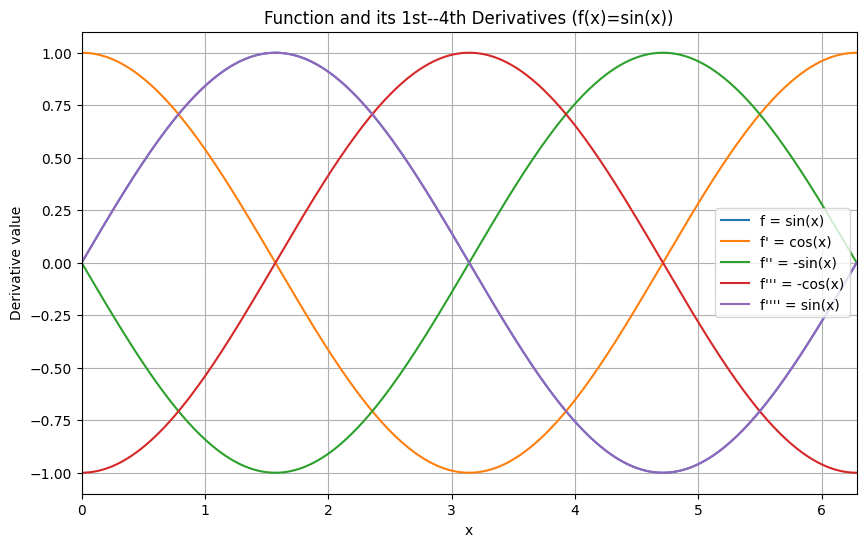

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 400)
f = np.sin(x)
f1 = np.cos(x)      
f2 = -np.sin(x)     
f3 = -np.cos(x)      
f4 = np.sin(x)       

plt.figure(figsize=(10, 6))
plt.plot(x, f,  label='f = sin(x)')
plt.plot(x, f1, label="f' = cos(x)")
plt.plot(x, f2, label="f'' = -sin(x)")
plt.plot(x, f3, label="f''' = -cos(x)")
plt.plot(x, f4, label="f'''' = sin(x)")
plt.xlim(0, 2 * np.pi)
plt.xlabel('x')
plt.ylabel('Derivative value')
plt.title('Function and its 1st--4th Derivatives (f(x)=sin(x))')
plt.legend()
plt.grid(True)
plt.show()

### Engineering Problem: Beam Deflection Analysis

A simply supported beam of length (L = 10m ) is subjected to a uniformly distributed load w = 5 kN/m. The deflection y(x) of the beam at a distance x from the left support is given by:

$$
y(x) = \frac{w}{24EI} \, x \left( L^3 - 2Lx^2 + x^3 \right)
$$


#### 🎯 Task:
Given deflection data y(x) along a beam, estimate the bending moment M(x) and shear force V(x) using numerical differentiation and plot them. 

Equations:
$$ M(x) = -EI \frac{d^2 y}{dx^2}$$
$$ V(x) = \frac{dM}{dx} $$

#### 📌 Constants:
- L = 10 
- w = 5 
- E = 200e9
- I = 1e-6

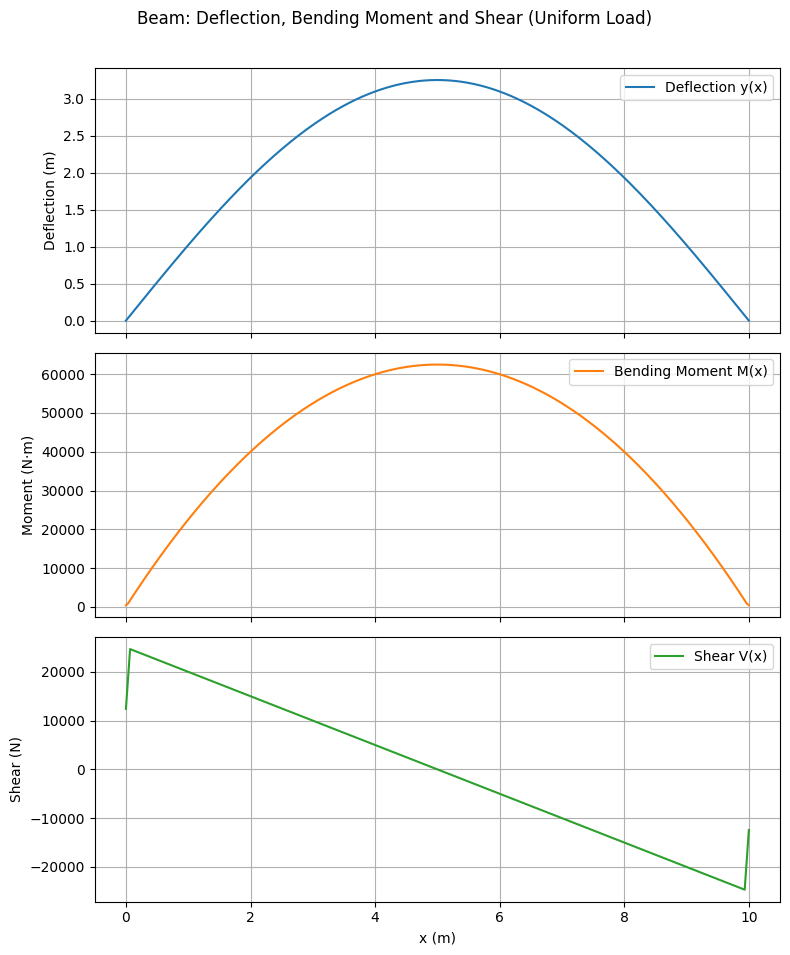

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = 5      
L = 10     
E = 200e9  
I = 1e-6   

w_N = w * 1e3
x_beam = np.linspace(0, L, 300)  

y = (w_N / (24 * E * I)) * x_beam * (L**3 - 2 * L * x_beam**2 + x_beam**3)

dy_dx = np.gradient(y, x_beam)
d2y_dx2 = np.gradient(dy_dx, x_beam)

M = -E * I * d2y_dx2
V = np.gradient(M, x_beam)

fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
axes[0].plot(x_beam, y, label='Deflection y(x)', color='C0')
axes[0].set_ylabel('Deflection (m)')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(x_beam, M, label='Bending Moment M(x)', color='C1')
axes[1].set_ylabel('Moment (N·m)')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(x_beam, V, label='Shear V(x)', color='C2')
axes[2].set_xlabel('x (m)')
axes[2].set_ylabel('Shear (N)')
axes[2].legend()
axes[2].grid(True)

plt.suptitle('Beam: Deflection, Bending Moment and Shear (Uniform Load)')
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


## 4. Ordinary Differential Equations - Initial Value Problems

This notebook introduces Ordinary Differential Equations (ODEs) with a focus on Initial Value Problems (IVPs). We will explore numerical methods such as Euler's Method and Runge-Kutta Methods with examples and visualizations.



### What is an ODE?

An Ordinary Differential Equation (ODE) is an equation involving a function and its derivatives.

### Initial Value Problem (IVP)
An IVP is an ODE along with a specified value at a starting point:

$$\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$



#### (a) Euler's Method

Algorithm:
1. Choose step size \( h \)
2. Iterate: \( y_{n+1} = y_n + h f(x_n, y_n) \)
3. Repeat for desired number of steps


#### Exercise
Use Euler's Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

Euler approximation at x=1.00: 2.70970474
True solution at x=1.00:       2.71828183
Absolute error: 8.58e-03


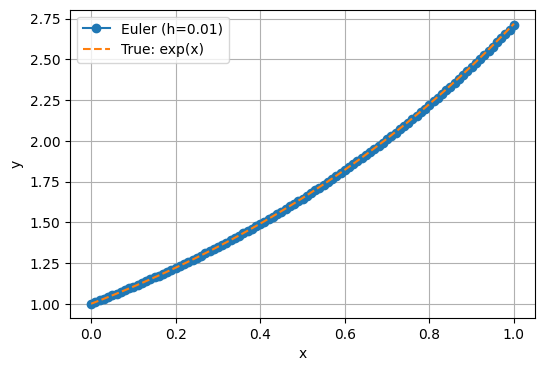

In [13]:
f = lambda x, y: np.exp(x)

x0 = 0.0
y0 = 1.0
xf = 1.0   
h = 0.01   

n = int(np.ceil((xf - x0) / h))
x_vals = np.empty(n + 1)
y_vals = np.empty(n + 1)
x_vals[0] = x0
y_vals[0] = y0

for i in range(n):
	x_i = x_vals[i]
	y_i = y_vals[i]
	y_vals[i + 1] = y_i + h * f(x_i, y_i)
	x_vals[i + 1] = x_i + h

y_true = np.exp(x_vals)

print(f"Euler approximation at x={x_vals[-1]:.2f}: {y_vals[-1]:.8f}")
print(f"True solution at x={x_vals[-1]:.2f}:       {y_true[-1]:.8f}")
print(f"Absolute error: {abs(y_vals[-1] - y_true[-1]):.2e}")

plt.figure(figsize=(6, 4))
plt.plot(x_vals, y_vals, 'o-', label=f'Euler (h={h})')
plt.plot(x_vals, y_true, '--', label='True: exp(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


#### (b) Runge-Kutta Method (RK4)

Algorithm:
1. Compute intermediate slopes:
   - \( k_1 = h f(x_n, y_n) \)
   - \( k_2 = h f(x_n + h/2, y_n + k_1/2) \)
   - \( k_3 = h f(x_n + h/2, y_n + k_2/2) \)
   - \( k_4 = h f(x_n + h, y_n + k_3) \)
2. Update: \( y_{n+1} = y_n + (k_1 + 2k_2 + 2k_3 + k_4)/6 \)


#### Exercise
Use RK4 Method, solve dy/dx = exp(x) with the initial condition y(0)= 1

RK4 approximation at x=1.00: 2.71828183
True solution at x=1.00:       2.71828183
Absolute error: 5.96e-12


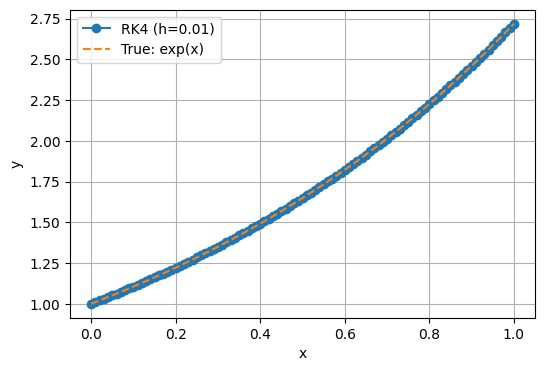

In [15]:
f = lambda x, y: np.exp(x)

x0 = 0.0
y0 = 1.0
xf = 1.0
h = 0.01

n = int(np.ceil((xf - x0) / h))
x_rk = np.empty(n + 1)
y_rk = np.empty(n + 1)
x_rk[0] = x0
y_rk[0] = y0

for i in range(n):
	xi = x_rk[i]
	yi = y_rk[i]
	k1 = h * f(xi, yi)
	k2 = h * f(xi + h/2, yi + k1/2)
	k3 = h * f(xi + h/2, yi + k2/2)
	k4 = h * f(xi + h, yi + k3)
	y_rk[i + 1] = yi + (k1 + 2*k2 + 2*k3 + k4) / 6
	x_rk[i + 1] = xi + h

y_true = np.exp(x_rk)

print(f"RK4 approximation at x={x_rk[-1]:.2f}: {y_rk[-1]:.8f}")
print(f"True solution at x={x_rk[-1]:.2f}:       {y_true[-1]:.8f}")
print(f"Absolute error: {abs(y_rk[-1] - y_true[-1]):.2e}")

plt.figure(figsize=(6, 4))
plt.plot(x_rk, y_rk, 'o-', label=f'RK4 (h={h})')
plt.plot(x_rk, y_true, '--', label='True: exp(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
